In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data=pd.read_csv('/kaggle/input/coffee-quality-data-cqi/df_arabica_clean.csv')

Sensory evaluations (coffee quality scores)

    Aroma: Refers to the scent or fragrance of the coffee.
    Flavor: The flavor of coffee is evaluated based on the taste, including any sweetness, bitterness, acidity, and other flavor notes.
    Aftertaste: Refers to the lingering taste that remains in the mouth after swallowing the coffee.
    Acidity: Acidity in coffee refers to the brightness or liveliness of the taste.
    Body: The body of coffee refers to the thickness or viscosity of the coffee in the mouth.
    Balance: Balance refers to how well the different flavor components of the coffee work together.
    Uniformity: Uniformity refers to the consistency of the coffee from cup to cup.
    Clean Cup: A clean cup refers to a coffee that is free of any off-flavors or defects, such as sourness, mustiness, or staleness.
    Sweetness: It can be described as caramel-like, fruity, or floral, and is a desirable quality in coffee.


In [3]:
data.head(2)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"


# Descriptive Statistics

In [4]:
numeric_variables = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
                     'Sweetness', 'Overall', 'Defects', 'Total Cup Points']
statistics = data[numeric_variables].describe().transpose()
statistics

,count,mean,std,min,25%,50%,75%,max
Aroma,207.0,7.721063,0.287626,6.50,7.58,7.67,7.920,8.58
Flavor,207.0,7.744734,0.279613,6.75,7.58,7.75,7.920,8.50
Aftertaste,207.0,7.599758,0.275911,6.67,7.42,7.58,7.750,8.42
Acidity,207.0,7.690290,0.259510,6.83,7.50,7.67,7.875,8.58
Body,207.0,7.640918,0.233499,6.83,7.50,7.67,7.750,8.25
Balance,207.0,7.644058,0.256299,6.67,7.50,7.67,7.790,8.42
Uniformity,207.0,9.990338,0.103306,8.67,10.00,10.00,10.000,10.00
Sweetness,207.0,10.000000,0.000000,10.00,10.00,10.00,10.000,10.00
Overall,207.0,7.676812,0.306359,6.67,7.50,7.67,7.920,8.58
Defects,207.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00


# Data Visualization

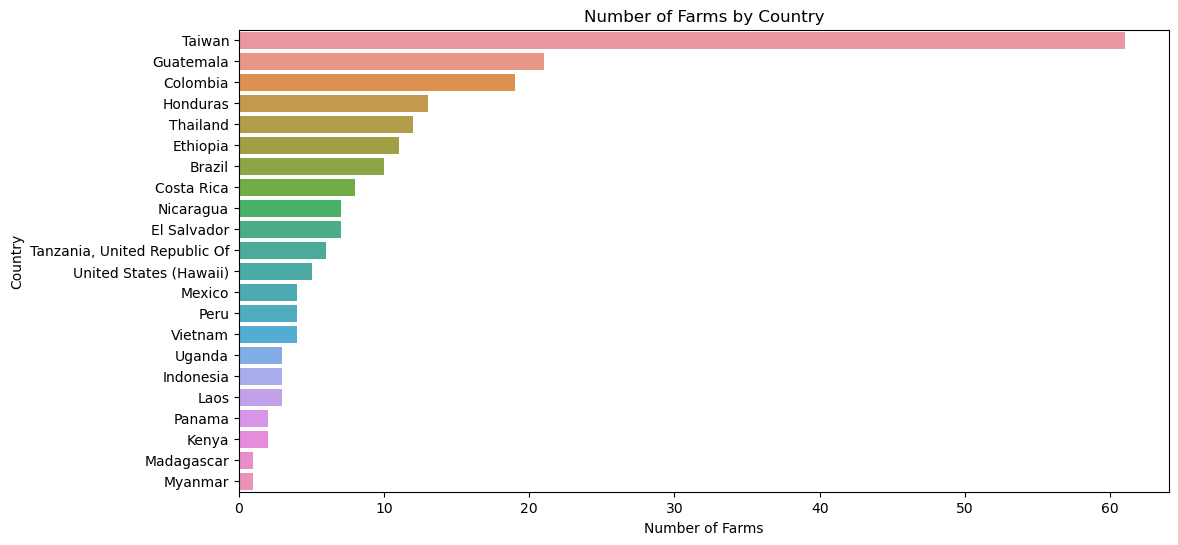

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Country of Origin', order=data['Country of Origin'].value_counts().index)
plt.xlabel('Number of Farms')
plt.ylabel('Country')
plt.title('Number of Farms by Country')
plt.show()

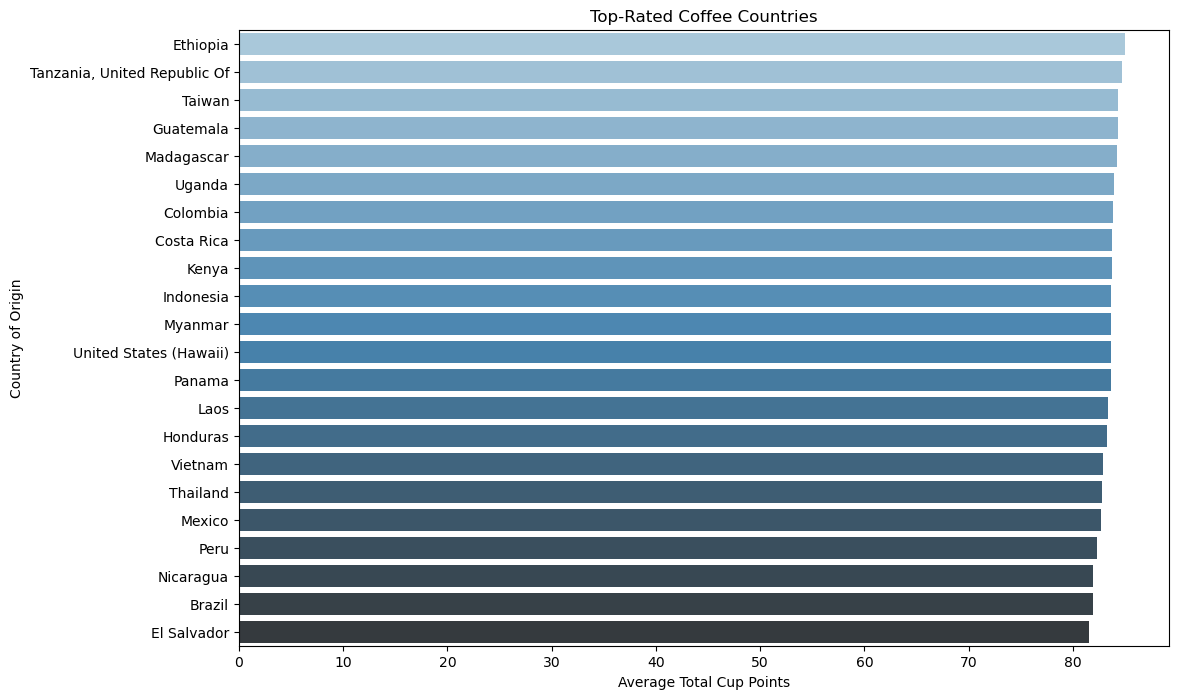

In [6]:
average_points = data.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()
sorted_countries = average_points.sort_values('Total Cup Points', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_countries, x='Total Cup Points', y='Country of Origin', palette='Blues_d')
plt.xlabel('Average Total Cup Points')
plt.ylabel('Country of Origin')
plt.title('Top-Rated Coffee Countries')
plt.show()

In [7]:
average_points = data.groupby(['Country of Origin', 'Farm Name'])['Total Cup Points'].mean().reset_index()
sorted_farms = average_points.sort_values(['Country of Origin', 'Total Cup Points'], ascending=[True, False])
top_farms = sorted_farms.groupby('Country of Origin').first().reset_index()
fig = px.scatter(top_farms, x='Total Cup Points', y='Country of Origin', text='Farm Name',
                 title='Top Farms in Each Country', color='Total Cup Points',
                 labels={'Total Cup Points': 'Average Total Cup Points'})
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_title='Average Total Cup Points')
fig.show()

In [8]:
producer_counts = data['Producer'].value_counts().reset_index()
producer_counts.columns = ['Producer', 'Farm Count']
sorted_producers = producer_counts.sort_values('Farm Count', ascending=False)
top_producers = sorted_producers.head(20)
fig = px.bar(top_producers, x='Producer', y='Farm Count',
             title='Top Producers', labels={'Farm Count': 'Number of Farms'})

fig.show()

fig = px.sunburst(top_producers, path=['Producer'], values='Farm Count',
                  title='Top Producers')

fig.show()

In [9]:
columns = ['Flavor', 'Aroma', 'Aftertaste', 'Acidity', 'Body', 'Balance',
           'Uniformity', 'Sweetness', 'Overall']
data['Mean Score'] = data[columns].mean(axis=1)
best_coffee_row = data.loc[data['Mean Score'].idxmax()]
best_coffee_details = best_coffee_row[['Company', 'Variety', 'Country of Origin', 'Farm Name', 'Processing Method']]
print("Best Coffee Combination:")
print("Company:", best_coffee_details['Company'])
print("Variety:", best_coffee_details['Variety'])
print("Country of Origin:", best_coffee_details['Country of Origin'])
print("Farm Name:", best_coffee_details['Farm Name'])
print("Processing Method:", best_coffee_details['Processing Method'])

Best Coffee Combination:
Company: Coffee Quality Union
Variety: Castillo
Country of Origin: Colombia
Farm Name: Finca El Paraiso
Processing Method: Double Anaerobic Washed


In [10]:
company_counts = data['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Farm Count']
sorted_companies = company_counts.sort_values('Farm Count', ascending=False)
top_companies = sorted_companies.head(5)
for company in top_companies['Company']:
    company_data = data[data['Company'] == company]
    variety_moisture = company_data.groupby('Variety')['Moisture Percentage'].mean().reset_index()
    sorted_varieties = variety_moisture.sort_values('Moisture Percentage', ascending=True)
    best_variety = sorted_varieties.iloc[0]['Variety']
    fig = px.bar(sorted_varieties, x='Variety', y='Moisture Percentage',
                 title=f'Best Moisture Percentage Variety for {company}', labels={'Moisture Percentage': 'Average Moisture Percentage'})

    fig.show()


In [11]:

company_counts = data['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Farm Count']
sorted_companies = company_counts.sort_values('Farm Count', ascending=False)
top_companies = sorted_companies.head(5)
for company in top_companies['Company']:
    company_data = data[data['Company'] == company]
    variety_flavor = company_data.groupby('Variety')['Flavor'].mean().reset_index()
    sorted_varieties = variety_flavor.sort_values('Flavor', ascending=False)
    best_variety = sorted_varieties.iloc[0]['Variety']
    fig = px.bar(sorted_varieties, x='Variety', y='Flavor',
                 title=f'Best Flavor Variety for {company}', labels={'Flavor': 'Average Flavor'})

    fig.show()


In [12]:
company_counts = data['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Farm Count']
sorted_companies = company_counts.sort_values('Farm Count', ascending=False)
top_companies = sorted_companies.head(5)
for company in top_companies['Company']:
    company_data = data[data['Company'] == company]
    processing_counts = company_data['Processing Method'].value_counts().reset_index()
    processing_counts.columns = ['Processing Method', 'Farm Count']
    sorted_processing = processing_counts.sort_values('Farm Count', ascending=False)
    best_processing = sorted_processing.iloc[0]['Processing Method']
    fig = px.bar(sorted_processing, x='Processing Method', y='Farm Count',
                 title=f'Best Processing Method for {company}', labels={'Farm Count': 'Number of Farms'})

    fig.show()

In [13]:
variety_counts = data['Variety'].value_counts().reset_index()
variety_counts.columns = ['Variety', 'Farm Count']
sorted_varieties = variety_counts.sort_values('Farm Count', ascending=False)
top_varieties = sorted_varieties.head(15)
fig = px.bar(top_varieties, x='Variety', y='Farm Count',
             title='Top Varieties', labels={'Farm Count': 'Number of Farms'})
fig.show()
fig = px.sunburst(top_varieties, path=['Variety'], values='Farm Count',
                  title='Top Varieties')
fig.show()

In [14]:
company_counts = data['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Farm Count']
sorted_companies = company_counts.sort_values('Farm Count', ascending=False)
top_company = sorted_companies.iloc[0]['Company']
top_company_data = data[data['Company'] == top_company]
country_counts = top_company_data['Country of Origin'].value_counts().reset_index()
country_counts.columns = ['Country', 'Farm Count']
fig = px.choropleth(country_counts, locations='Country', locationmode='country names',
                    color='Farm Count', title='Top Company: Farms by Country')
fig.show()

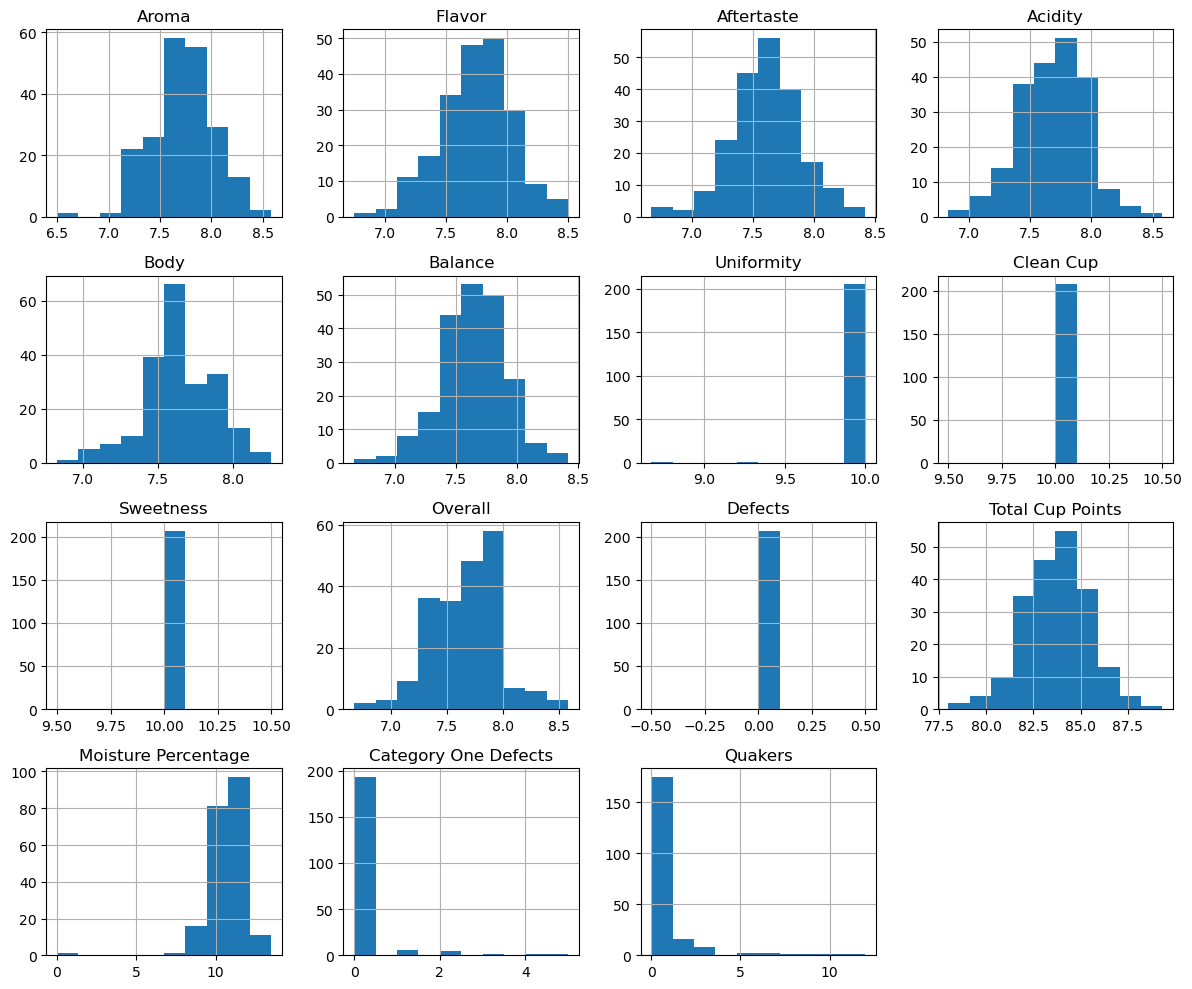

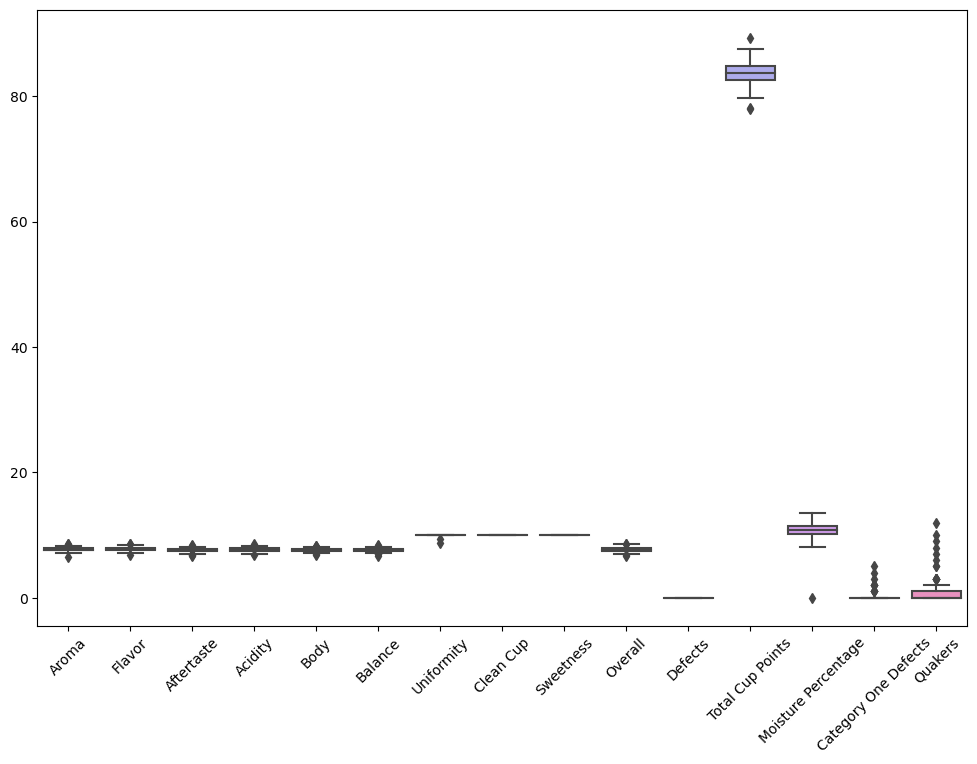

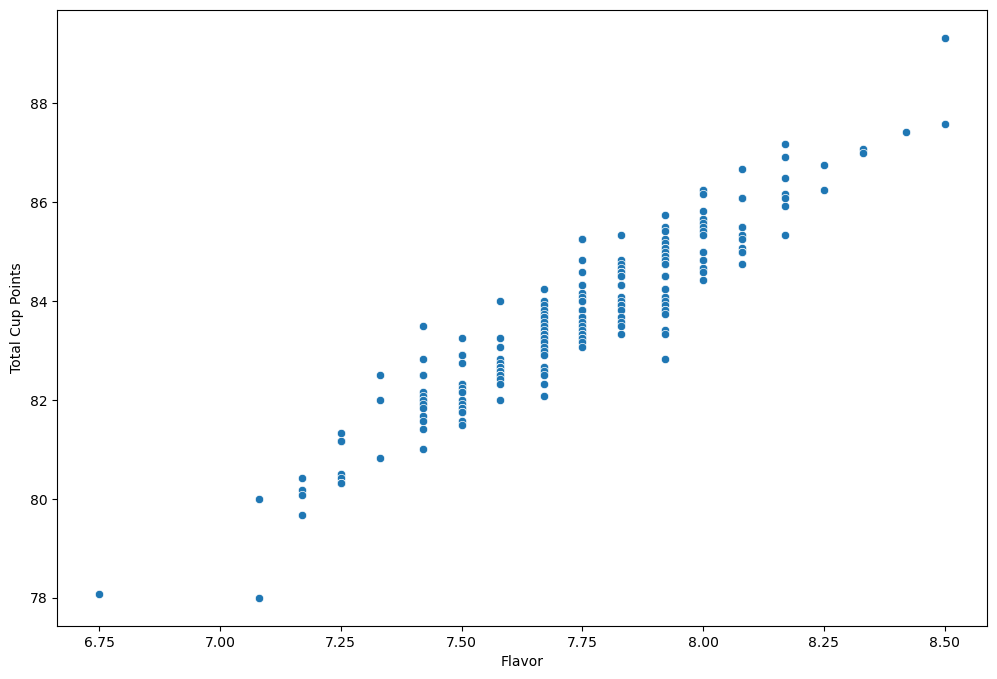

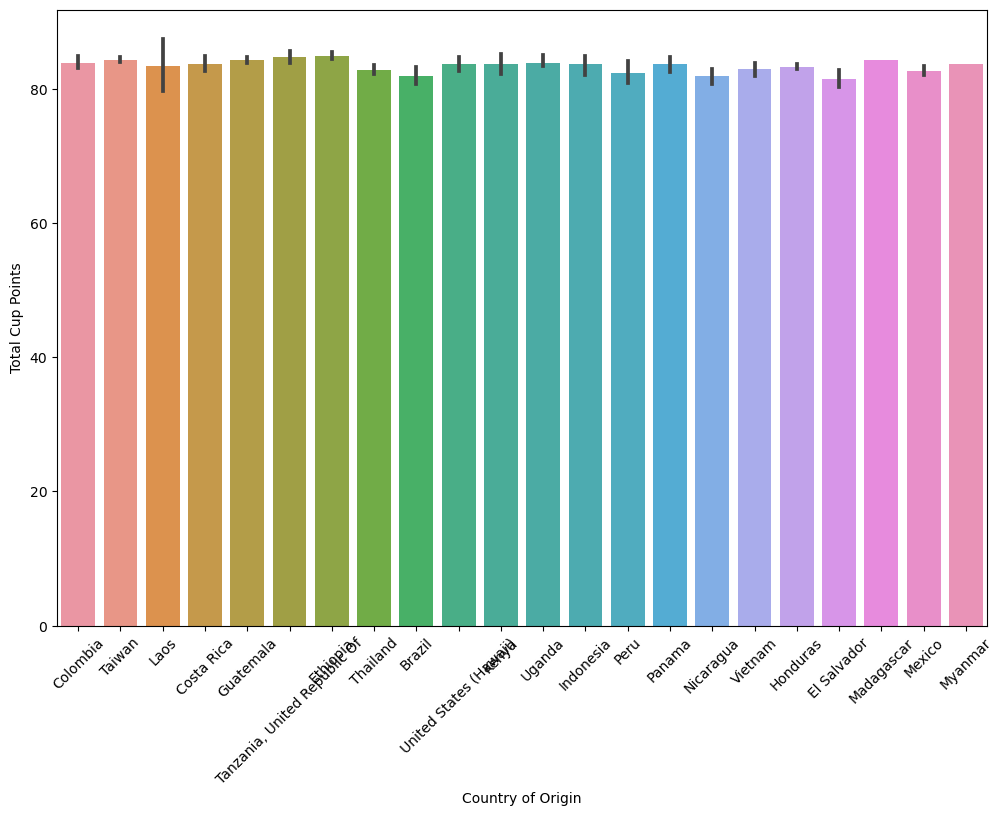

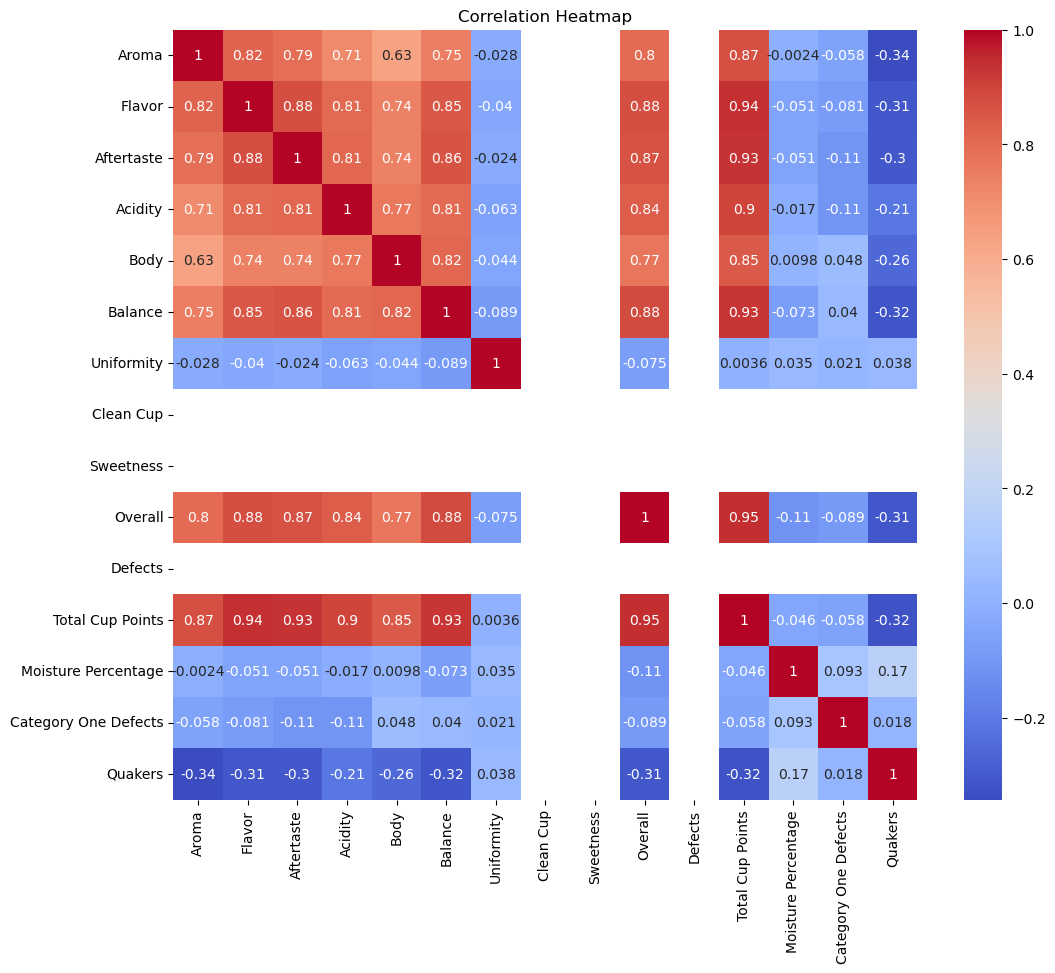

In [15]:
variables = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
             'Clean Cup', 'Sweetness', 'Overall', 'Defects', 'Total Cup Points',
             'Moisture Percentage', 'Category One Defects', 'Quakers']
data[variables].hist(bins=10, figsize=(12, 10))
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[variables])
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Flavor', y='Total Cup Points')
plt.xlabel('Flavor')
plt.ylabel('Total Cup Points')
plt.show()
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x='Country of Origin', y='Total Cup Points')
plt.xlabel('Country of Origin')
plt.ylabel('Total Cup Points')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(12, 10))
corr = data[variables].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Correlation Analysis

In [16]:
variables = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
             'Sweetness', 'Overall', 'Defects', 'Total Cup Points']
corr_matrix = data[variables].corr()
fig = px.imshow(corr_matrix,
                labels=dict(x="Variables", y="Variables", color="Correlation"),
                x=variables,
                y=variables,
                color_continuous_scale='RdBu',
                title='Correlation Heatmap')

fig.update_layout(width=800, height=800)
fig.show()

# Imports

In [17]:
import matplotlib.pyplot  as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Check to see which one is working properly. 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [19]:
scaler=MinMaxScaler()
oneHotEncoder=OneHotEncoder()
label_Encoder=LabelEncoder()

# Preprocessing

In [20]:
data=pd.read_csv("/kaggle/input/coffee-quality-data-cqi/df_arabica_clean.csv")

In [21]:
for column in data.columns:
    if " " in column:
        new_column=column.replace(" ","_")
        data.rename(columns={column:new_column},inplace=True)
df=data

In [22]:
df = data.drop(['Unnamed:_0', 'Farm_Name', 'Mill', 'ICO_Number', 'Company',
                  'Producer', 'In-Country_Partner', 'Lot_Number', 'Owner',
                  'Certification_Body', 'Grading_Date', 'Certification_Address',
                  'Certification_Contact','Status'], axis=1)

In [23]:
df['Year'] = pd.to_datetime(df['Expiration']).dt.year
df['Month'] = pd.to_datetime(df['Expiration']).dt.month
df['Day'] = pd.to_datetime(df['Expiration']).dt.day
df.drop(columns="Expiration",axis=1,inplace=True)

In [24]:
df.head(3)

,ID,Country_of_Origin,Altitude,Region,Number_of_Bags,Bag_Weight,Harvest_Year,Variety,Processing_Method,Aroma,...,Defects,Total_Cup_Points,Moisture_Percentage,Category_One_Defects,Quakers,Color,Category_Two_Defects,Year,Month,Day
0,0,Colombia,1700-1930,"Piendamo,Cauca",1,35 kg,2021 / 2022,Castillo,Double Anaerobic Washed,8.58,...,0.0,89.33,11.8,0,0,green,3,2023,9,21
1,1,Taiwan,1200,Chiayi,1,80 kg,2021 / 2022,Gesha,Washed / Wet,8.50,...,0.0,87.58,10.5,0,0,blue-green,0,2023,11,15
2,2,Laos,1300,Laos Borofen Plateau,19,25 kg,2021 / 2022,Java,Semi Washed,8.33,...,0.0,87.42,10.4,0,0,yellowish,2,2023,11,15


In [25]:
df["Country_of_Origin"]=label_Encoder.fit_transform(df["Country_of_Origin"])
df["Region"]=label_Encoder.fit_transform(df["Region"])
df["Bag_Weight"]=label_Encoder.fit_transform(df["Bag_Weight"])
df["Variety"]=label_Encoder.fit_transform(df["Variety"])
df["Processing_Method"]=label_Encoder.fit_transform(df["Processing_Method"])
df["Color"]=label_Encoder.fit_transform(df["Color"])


In [26]:
altitude = df['Altitude'].apply(lambda x: (sum(map(int, x.split('-')))/2 if '-' in x else int(x)) if isinstance(x, str) and x.replace('-', '').isdigit() else np.nan)
altitude.fillna(-1, inplace=True)
df['Altitude'] = altitude.astype(int)

In [27]:
df['Harvest_Year'] = df['Harvest_Year'].str.extract(r'(\d{4})')
df['Harvest_Year'] = pd.to_numeric(df['Harvest_Year'], errors='coerce')

In [28]:
df

,ID,Country_of_Origin,Altitude,Region,Number_of_Bags,Bag_Weight,Harvest_Year,Variety,Processing_Method,Aroma,...,Defects,Total_Cup_Points,Moisture_Percentage,Category_One_Defects,Quakers,Color,Category_Two_Defects,Year,Month,Day
0,0,1,1815,76,1,22,2021,4,1,8.58,...,0.0,89.33,11.8,0,0,4,3,2023,9,21
1,1,16,1200,26,1,36,2021,19,8,8.50,...,0.0,87.58,10.5,0,0,0,0,2023,11,15
2,2,9,1300,52,19,15,2021,20,7,8.33,...,0.0,87.42,10.4,0,0,11,2,2023,11,15
3,3,2,1900,55,1,13,2022,19,8,8.08,...,0.0,87.17,11.8,0,0,4,0,2023,9,21
4,4,1,1975,77,2,14,2022,29,3,8.33,...,0.0,87.08,11.6,0,2,10,2,2024,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,0,950,95,2240,32,2022,25,4,7.17,...,0.0,80.08,11.4,0,0,4,4,2024,2,2
203,203,13,1200,60,300,18,2022,31,4,7.33,...,0.0,80.00,10.4,0,2,4,12,2024,3,2
204,204,9,1300,11,343,32,2021,8,8,7.25,...,0.0,79.67,11.6,0,9,4,11,2023,11,11
205,205,3,1200,102,1,10,2023,24,4,6.50,...,0.0,78.08,11.0,0,12,1,13,2024,3,7


# Modeling

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
y = df['Total_Cup_Points']
x = df.drop("Total_Cup_Points", axis=1)


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [32]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [33]:
model=LinearRegression(fit_intercept=True)

In [34]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [35]:
prediction=model.predict(x_test_scaled)

In [36]:
from sklearn.metrics import mean_squared_error,r2_score

In [37]:
print(f"the mae:",mean_squared_error(prediction,y_test))
print(f"the r2_score:",r2_score(prediction,y_test))

the mae: 0.2567496825278702
the r2_score: 0.9475967247857487


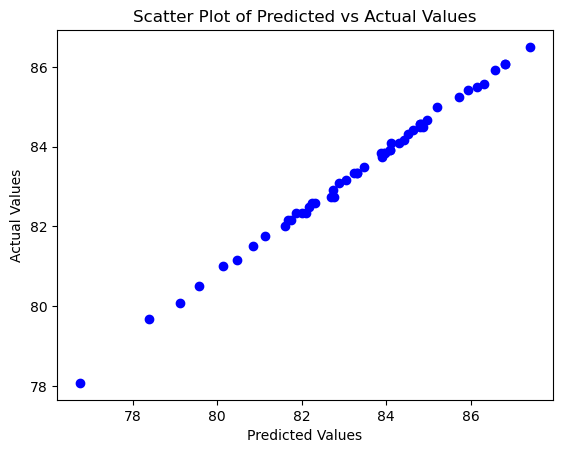

In [38]:
plt.scatter(prediction, y_test, color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

In [39]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor()
]

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum

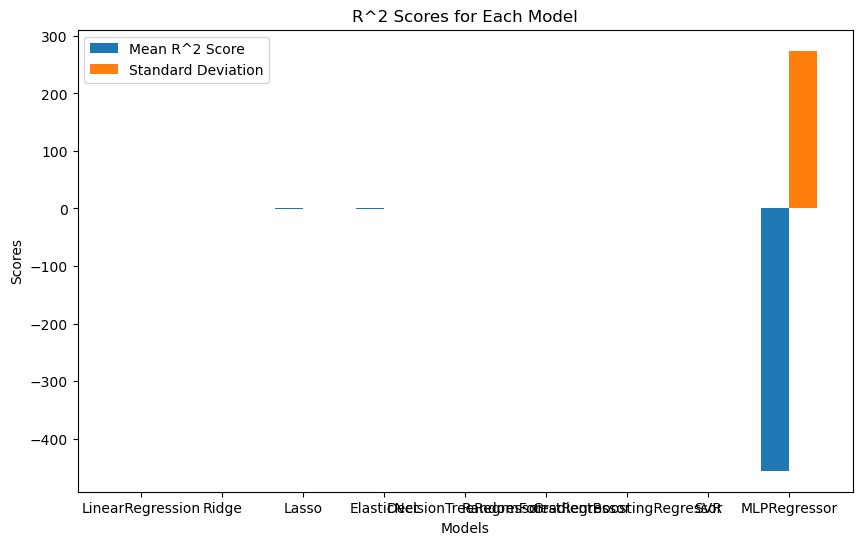

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'models' is a list of your models
model_names = [model.__class__.__name__ for model in models]
mean_scores = []
std_devs = []

# Calculate mean and standard deviation for each model
for model in models:
    scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='r2')
    mean_scores.append(scores.mean())
    std_devs.append(scores.std())

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(model_names))

bar1 = ax.bar(index, mean_scores, bar_width, label='Mean R^2 Score')
bar2 = ax.bar(index + bar_width, std_devs, bar_width, label='Standard Deviation')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('R^2 Scores for Each Model')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()


In [41]:
for model in models:
    scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='r2')
    print(f"{model.__class__.__name__}:")
    print(f"  Mean R^2 Score: {scores.mean():.4f}")
    print(f"  Standard Deviation: {scores.std():.4f}")
    print()

LinearRegression:
  Mean R^2 Score: 0.9957
  Standard Deviation: 0.0085

Ridge:
  Mean R^2 Score: 0.9899
  Standard Deviation: 0.0062

Lasso:
  Mean R^2 Score: -0.0322
  Standard Deviation: 0.0318

ElasticNet:
  Mean R^2 Score: -0.0306
  Standard Deviation: 0.0290

DecisionTreeRegressor:
  Mean R^2 Score: 0.9657
  Standard Deviation: 0.0158

RandomForestRegressor:
  Mean R^2 Score: 0.9777
  Standard Deviation: 0.0245

GradientBoostingRegressor:
  Mean R^2 Score: 0.9817
  Standard Deviation: 0.0199

SVR:
  Mean R^2 Score: 0.9390
  Standard Deviation: 0.0381



/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPRegressor:
  Mean R^2 Score: -395.3694
  Standard Deviation: 104.1324



/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



# Conclusion:

## In this notebook, we performed analysis and modeling on a dataset related to sensory evaluations of coffee quality scores. We explored various features related to aroma, flavor, aftertaste, acidity, body, balance, uniformity, cleanliness, sweetness, and overall quality of coffee.

Best Coffee Combination:
Company: Coffee Quality Union
Variety: Castillo
Country of Origin: Colombia
Farm Name: Finca El Paraiso
Processing Method: Double Anaerobic Washed


We started by preprocessing the data, including handling missing values and encoding categorical variables. We dropped irrelevant columns and extracted useful information from date columns.

For the modeling phase, we split the data into training and testing sets. We applied feature scaling using the MinMaxScaler to normalize the numeric features. We then trained a Linear Regression model and evaluated its performance using mean squared error (MAE) and R-squared score. The model achieved a low MAE of 0.2567 and a high R-squared score of 0.9476, indicating a good fit to the data.

Furthermore, we compared the performance of various regression models using cross-validation. The models included Linear Regression, Ridge, Lasso, ElasticNet, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, Support Vector Regressor (SVR), and MLP Regressor. Among these models, Linear Regression, Ridge, and Random Forest Regressor showed promising performance with high R-squared scores and low standard deviations.

In conclusion, based on the evaluation metrics and cross-validation results, the Linear Regression model demonstrated good performance in predicting coffee quality scores. However, further experimentation and tuning of hyperparameters could be beneficial to improve the model's performance and explore other potential regression models.